In [1]:
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from Plotting import plot

### Learning simplest test: learn to multiply by 2

In [2]:
x,y = np.arange(10), 2*np.arange(10)
print("input:",x)
print("target:", y)
w = -3.0                 # initialize the weight 
alpha = 0.01             # learning rate

input: [0 1 2 3 4 5 6 7 8 9]
target: [ 0  2  4  6  8 10 12 14 16 18]


In [3]:
i = np.random.randint(len(x))        # choose i.i.d training sample 
w += alpha*(y[i]-w*x[i])             # w = w + alpha*error  
error = np.sum(np.power(x[i]*w - y[i],2))
print("Current w:", w, "  Error:", error)

Current w: -2.6   Error: 1354.2399999999998


#### Test Phase: Samples not in the training set!

In [4]:
x = np.random.uniform(10,size=5)
y = 2*x                                 # usually DataSet is divided between training set and test set
print("Test Set", x)
error = np.sum(np.power(y-x*w,2))
print("Error on test set: ", error)

Test Set [7.65293167 7.71629922 1.63861213 3.52699083 3.93371798]
Error on test set:  3146.650446757092


### Learning simplest test with biass: learn to multiply and sum

In [5]:
x = np.arange(10)
y = 2*x+1
w = -3.0 
alpha = 0.01
print("input:",x)
print("target:", y)

input: [0 1 2 3 4 5 6 7 8 9]
target: [ 1  3  5  7  9 11 13 15 17 19]


In [6]:
# with only one weight we cannot learn biass
i = np.random.randint(len(x))     # choose i.i.d sample 
w += alpha*(y[i]-w*x[i])          # w = w + alpha*error    
error = np.sum(np.power(x*w - y,2))
print("Current w:", w, "  Error:", error)

Current w: -2.79   Error: 6980.168500000001


<AxesSubplot:xlabel='Updates', ylabel='Error'>

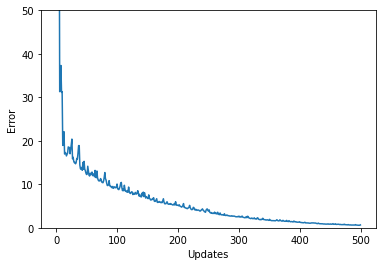

In [7]:
x = np.arange(10)   # training dataset
y = 2*x+1

w = [0.1, 3.3]  # w0 = the weight, w1 = bias  
alpha = 0.01

def f(x,w):
    return w[0]*x + w[1]   # output computation

gsteps, error, errors = 0, 1000, []
while gsteps < 500 and error > 0.005:
    i = np.random.randint(len(x))               # choose random training sample: must be i.i.d. 
    w[0] += alpha*(y[i]-f(x[i],w))*x[i]         # the error in the direction of the derivative of the output wrt w[1] -> x
    w[1] += alpha*(y[i]-f(x[i],w))      
    error = np.sum(np.power(y - f(x,w),2))      # the MSE
    errors += [error]
    gsteps += 1
    
plot(errors, ylim=[0,50])

### Learning logic gates (the "and" gate)

In [8]:
# lets consider three weights (plus biass)
w = [0.01, -.01, .02]  
alpha = 0.01
x = [[0,0], [1,0], [0,1], [1,1]]  
y = [0, 1, 1, 1]                     # AND gate

def a(x):
    return 0 if x < 0 else 1
def f(x,w):
    return a(w[0]*x[0] + w[1]*x[1] + w[2])   # output computation

gsteps, error = 0, 1000000
while gsteps < 500:
    i = np.random.randint(len(x))               
    w[0] += alpha*(y[i]-f(x[i],w))*x[i][0]         
    w[1] += alpha*(y[i]-f(x[i],w))*x[i][1]       
    w[2] += alpha*(y[i]-f(x[i],w))      
    error = np.sum(np.power(y[i]-f(x[i],w),2))
    gsteps += 1
    
print("After learning: [0,0]->%f, [1,0]->%f, [0,1]->%f, [1,1]->%f"%(f([0,0],w),f([1,0],w),f([0,1],w),f([1,1],w))) 

After learning: [0,0]->0.000000, [1,0]->1.000000, [0,1]->1.000000, [1,1]->1.000000


## Introducing two layer networks (from scratch)
Here two nice web links explaining backprop: <BR>
<a href="https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/">Tutorial with two outputs</a> <BR>
<a href="https://medium.com/analytics-vidhya/coding-a-neural-network-for-xor-logic-classifier-from-scratch-b90543648e8a"> XOR from scratch </a>

Final outputs are [0. 1. 1. 0.]


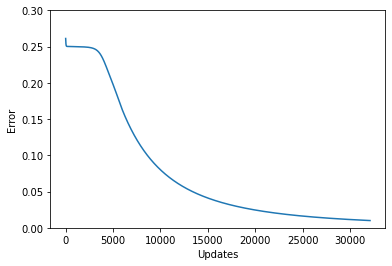

In [9]:
X = np.array([[0,0,1,1],[0,1,0,1]])
Y = np.array([[0, 1, 1, 0]]) 
n_xin, n_train = X.shape[0], X.shape[1]
n_hidden, n_yout = 2, 1

np.random.seed(10)
W1 = np.random.rand(n_hidden,n_xin)    # Weight matrix for hidden layer
W2 = np.random.rand(n_yout,n_hidden)   # Weight matrix for output layer

def a(x):
    return 1/(1+np.exp(-x))

def forward(w1,w2,x):
    z1 = np.dot(w1,x)
    o1 = a(z1)    
    z2 = np.dot(w2,o1)
    o2 = a(z2)
    return [z1,o1,z2,o2]

def backprop(x,y,w1,w2):
    z1,o1,z2,o2 = forward(w1,w2,x)
    n = x.shape[1]
    dz2 = o2-y
    dw2 = np.dot(dz2,o1.T)/n
    dz1 = np.dot(w2.T,dz2)*o1*(1-o1)
    dw1 = np.dot(dz1,x.T)/n
    dw1 = np.reshape(dw1,w1.shape)
    dw2 = np.reshape(dw2,w2.shape)    
    return [dw1,dw2]

alpha = 0.1
NSTEPS, steps, error, errors = 50000, 0, 10000, []
while steps < NSTEPS and error > 0.01:
    dW1,dW2 = backprop(X,Y,W1,W2)
    W1 -= alpha*dW1
    W2 -= alpha*dW2
    steps += 1
    _,_,_,out = forward(W1,W2,X)
    error = (1/n_train)*np.sum((Y - out)**2)
    errors += [error]

plot(errors, ylim=[0,.3])

_,_,_,out = forward(W1,W2,X)
out[out<.5] = 0
out[out>=.5] = 1
print("Final outputs are", out[0])

## Introducing one layer Neural Network in keras

In [10]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, LSTM
import os                    # remove Deprecation Warnings
import tensorflow as tf
from tensorflow.python.util import deprecation
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
deprecation._PRINT_DEPRECATION_WARNINGS = False
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


class Perceptron_function():
    
    def __init__(self, inputs=2, outputs=1):
        self.inputs, self.outputs = inputs, outputs
        self.learning_rate = 0.001        
        self.model = Sequential(name="PerceptronNetwork")
        self.model.add(Dense(outputs, input_shape=(inputs,), activation="linear", kernel_initializer='random_uniform'))        
        self.model.compile(loss="mse", optimizer=Adam(lr=self.learning_rate))
        self.model.summary()

    def predict(self, s):
        s = s.flatten()         # we can discard input dimension
        s_batch = np.reshape(s, [1, s.shape[0]])
        return self.model.predict(s_batch)[0][0]

    def update(self, inputs, targets):
        inputs = inputs.flatten()
        inputs_batch = np.reshape(inputs, [1, inputs.shape[0]])
        targets_batch = np.array([targets])
        self.model.train_on_batch(inputs_batch, targets_batch)

    def update_batch(self, inputs, targets):
        self.model.train_on_batch(inputs, targets)
        
    def print_weights(self):
        w = self.model.get_weights()
        print("Network weights   w:",w[0].flatten(), "b:",w[1])

Using TensorFlow backend.


### Learn logic gates

In [11]:
def gen_input(igate=0):
    or_gate = {(0,0):0, (0,1):1, (1,0):1, (1,1):1}
    and_gate = {(0,0):0, (0,1):0, (1,0):0, (1,1):1}
    xor_gate = {(0,0):0, (0,1):1, (1,0):1, (1,1):0}
    
    if igate == 0: gate = or_gate
    elif igate == 1: gate = and_gate
    else: gate = xor_gate
    
    key = random.sample(list(gate.keys()),1)[0]
    s = np.array(key) 
    y = gate[key]
    return s,y

perceptron = Perceptron_function(inputs=2)
perceptron.print_weights()

Model: "PerceptronNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Network weights   w: [ 0.00303506 -0.00584241] b: [0.]


###### Train and Test

In [12]:
igate = 0 # OR Gate
for _ in range(5000):          # train the network with input-output pairs
    s,y = gen_input(igate)
    perceptron.update(s, y)

perceptron.print_weights()
print("\nTest:\n-----")
error = 0
for _ in range(10):          # test the network with mean squared error (MSE)
    s,y = gen_input(igate)
    print("x:",s,"target", y, "predicted output:", perceptron.predict(s))
    error += np.power(perceptron.predict(s)-y,2)  # MSE
    
print("\nMSE error =", error)

Network weights   w: [0.49355283 0.49934512] b: [0.24818535]

Test:
-----
x: [1 1] target 1 predicted output: 1.2410834
x: [0 0] target 0 predicted output: 0.24818535
x: [1 0] target 1 predicted output: 0.7417382
x: [0 0] target 0 predicted output: 0.24818535
x: [0 0] target 0 predicted output: 0.24818535
x: [0 0] target 0 predicted output: 0.24818535
x: [0 1] target 1 predicted output: 0.74753046
x: [1 0] target 1 predicted output: 0.7417382
x: [0 0] target 0 predicted output: 0.24818535
x: [0 1] target 1 predicted output: 0.74753046

MSE error = 0.6269810926813364


### Multi Layer NN with keras

In [13]:
class NN_function():
    
    def __init__(self, inputs=4, outputs=1):
        self.inputs, self.outputs = inputs, outputs
        self.model = Sequential(name="NN")
        self.model.add(Dense(8, input_shape=(inputs,), activation="relu"))
        self.model.add(Dense(16, activation="relu"))
        self.model.add(Dense(outputs, activation="linear"))

        self.learning_rate = 0.01        
        self.model.compile(loss="mse", optimizer=Adam(lr=self.learning_rate))
        self.model.summary()

    def predict(self, s):
        s = s.flatten()         # we can discard input dimension
        s_batch = np.reshape(s, [1, s.shape[0]])
        return self.model.predict(s_batch)[0][0]

    def update(self, inputs, targets):
        inputs = inputs.flatten()
        inputs_batch = np.reshape(inputs, [1, inputs.shape[0]])
        targets_batch = np.array([targets])
        self.model.train_on_batch(inputs_batch, targets_batch)
    
    def update_batch(self, inputs, targets):
        self.model.train_on_batch(inputs, targets)
        
    def print_weights(self):
        w = self.model.get_weights()
        print("w:",w[0].flatten(), "b:",w[1])

##### Learn logic gates

In [20]:
# Exercise: Train using NN_function (not the perceptron) all logic gates

# 1) Create an instance of the NN_function class (specify nº of inputs and outputs)
# 2) Make a training loop. Select examples of the gate by using  gen_input(igate=2) XOR
# 3) Perform a test loop. Select example call predict and compute MSE (y-nn(x))^2

### Train a Neural Network to Sum 
$f(x=[...]) = \sum_{i \in x}{i}$

In [15]:
# Exercise: Make a NN (use NN_function) learn to sum 4 input numbers 
# Same as before but now you must generate examples with random inputs and their sum